In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bmw.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


<Axes: xlabel='price', ylabel='Count'>

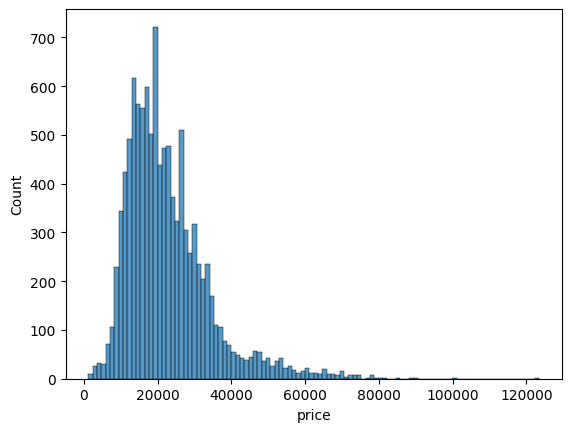

In [6]:
sns.histplot(x=df["price"])

In [7]:
# bu grafikten çıkarmamız gereken sonuç diğer arabalara göre çok pahalı birkaç araba var ve bu arabalar 
# tahmin yaparken yanılma oranını yükselttiği için pahalı olanlardan eksiltme yoluna gidebiliriz,


<Axes: xlabel='count', ylabel='year'>

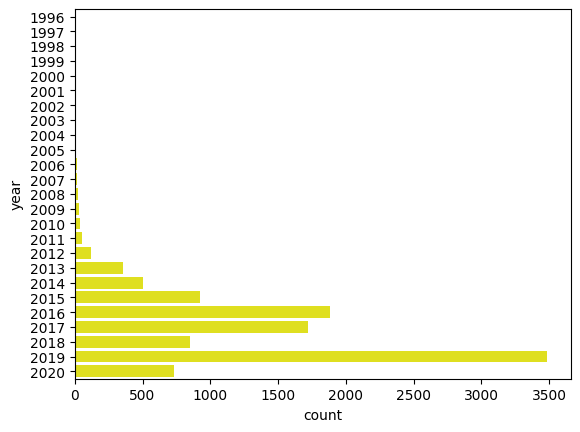

In [8]:
sns.countplot(data=df,y=df["year"],color="yellow")

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()["price"].sort_values()   
#dataframe de string türündeki ifadeyi ayırıp öyle korelasyon yaptık küçükten büyüğe sıraladık

In [10]:
numeric_df.head()

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0
2,2016,16000,62794,160,51.4,3.0
3,2017,12750,26676,145,72.4,1.5
4,2014,14500,39554,160,50.4,3.0


In [11]:
correlation
#Price verimizi hangi veriler pozitif hangi veriler negatif etkiliyor inceledik

mileage      -0.605397
mpg          -0.204882
tax           0.263484
engineSize    0.460196
year          0.623756
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='mileage'>

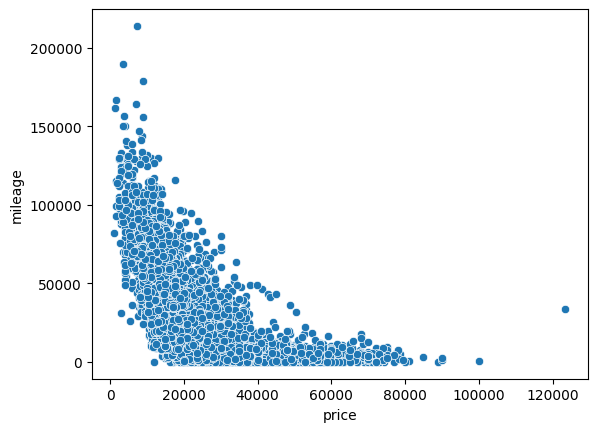

In [12]:
sns.scatterplot(data=df,x="price",y="mileage")

In [13]:
df.sort_values("price",ascending=False).head(10)
#en yüksek fiyatlı 10 araba

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0
5362,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0
2909,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0
4776,M5,2019,89900,Semi-Auto,2269,Petrol,145,24.1,4.4
1813,8 Series,2019,88980,Semi-Auto,88,Petrol,145,24.4,4.4
721,8 Series,2019,84898,Semi-Auto,3185,Petrol,145,24.4,4.4
5877,M5,2019,81140,Semi-Auto,551,Petrol,145,24.1,4.4
6115,8 Series,2020,79991,Semi-Auto,151,Diesel,145,26.7,3.0
7024,X7,2020,79566,Semi-Auto,1000,Petrol,145,24.8,3.0
2602,X7,2020,78490,Semi-Auto,4919,Diesel,145,31.4,3.0


In [14]:
df.sort_values("price",ascending=True).head(10)
#en düşük fiyatlı 10 araba

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9744,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8
9696,3 Series,2004,1445,Manual,162000,Diesel,205,49.6,2.0
9554,1 Series,2007,1500,Manual,167000,Diesel,125,57.6,2.0
10006,3 Series,2000,1550,Automatic,93000,Petrol,270,29.7,2.5
7284,5 Series,2002,1595,Automatic,115000,Petrol,325,28.5,2.2
9406,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0
9963,Z4,2004,1995,Manual,114000,Petrol,325,32.1,2.2
10009,3 Series,2002,2350,Manual,99000,Petrol,325,30.1,2.2
9220,3 Series,2007,2375,Manual,94000,Petrol,240,38.7,2.0
9918,1 Series,2010,2450,Manual,117454,Diesel,30,62.8,2.0


In [15]:
yuzdeDoksanDf=df.sort_values("price",ascending=False).iloc[90:] #en yüksek fiyatlı 95 arabayı çıkardık

In [16]:
len(yuzdeDoksanDf)

10691

In [17]:
yuzdeDoksanDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,10691.000000,10691.000000,10691.000000,10691.000000,10691.000000,10691.000000
mean,2017.062202,22311.767936,25673.115144,131.573286,56.518754,2.159059
std,2.350639,10467.256458,25171.511560,61.704422,31.233240,0.542543
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14888.500000,5627.500000,135.000000,46.300000,2.000000
50%,2017.000000,20260.000000,18754.000000,145.000000,53.300000,2.000000
75%,2019.000000,27533.000000,38458.000000,145.000000,62.800000,2.000000
max,2020.000000,65000.000000,214000.000000,580.000000,470.800000,6.600000


<Axes: xlabel='price', ylabel='Count'>

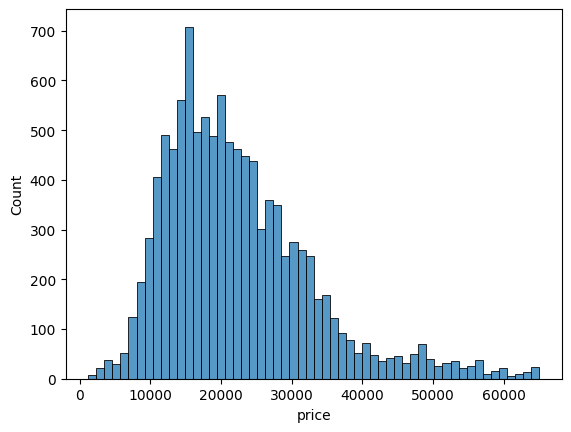

In [18]:
sns.histplot(x=yuzdeDoksanDf["price"])

In [19]:
# Grafiğimizden anlaşılacağı üzere price verileri daha anlamlı hale geldi

In [20]:
df.groupby("year")["price"].mean()

year
1996     5995.000000
1997     3950.000000
1998     3950.000000
1999     3285.000000
2000     1624.500000
2001     7333.333333
2002     5486.500000
2003     9222.500000
2004     8213.166667
2005     5390.166667
2006     5252.714286
2007     4830.500000
2008     6240.043478
2009     6618.100000
2010     7490.390244
2011     9099.098039
2012     9533.689076
2013    11118.355742
2014    13323.598802
2015    15199.753796
2016    16638.403826
2017    19267.174898
2018    22721.656840
2019    31025.864275
2020    35377.680764
Name: price, dtype: float64

In [21]:
# 2000 yılındaki fiyat ortalaması absürt olduğu için 
# veriden çıkarmanın sağlıklı olacağını düşünüyorum

In [22]:
df=yuzdeDoksanDf

In [23]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10691.000000,10691.000000,10691.000000,10691.000000,10691.000000,10691.000000
mean,2017.062202,22311.767936,25673.115144,131.573286,56.518754,2.159059
std,2.350639,10467.256458,25171.511560,61.704422,31.233240,0.542543
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14888.500000,5627.500000,135.000000,46.300000,2.000000
50%,2017.000000,20260.000000,18754.000000,145.000000,53.300000,2.000000
75%,2019.000000,27533.000000,38458.000000,145.000000,62.800000,2.000000
max,2020.000000,65000.000000,214000.000000,580.000000,470.800000,6.600000


In [24]:
df=df[df["year"] != 2000]

#2000 yılı verilerini çıkardık

In [25]:
df.groupby("year")["price"].mean()

year
1996     5995.000000
1997     3950.000000
1998     3950.000000
1999     3285.000000
2001     7333.333333
2002     5486.500000
2003     9222.500000
2004     8213.166667
2005     5390.166667
2006     5252.714286
2007     4830.500000
2008     6240.043478
2009     6618.100000
2010     7490.390244
2011     9099.098039
2012     9533.689076
2013    11118.355742
2014    13323.598802
2015    15082.211726
2016    16561.987234
2017    19226.056977
2018    22670.622196
2019    30245.095350
2020    34385.938375
Name: price, dtype: float64

In [26]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7750,8 Series,2019,65000,Automatic,11111,Petrol,150,26.9,4.4
4248,M5,2019,65000,Semi-Auto,4800,Petrol,145,26.9,4.4
6135,X5,2020,65000,Semi-Auto,1435,Petrol,145,23.2,4.4
6179,X7,2020,64999,Semi-Auto,4000,Diesel,145,33.6,3.0
6068,X7,2019,64999,Semi-Auto,1500,Diesel,150,33.6,3.0


In [27]:
# veriyi bu şekilde regresyon işlemini uygularsak hata alırız çümkü nümeric olmayan değerler var
# onları veriden temizlememiz gerekiyor

In [28]:
df=df.drop("model",axis=1)
df=df.drop("transmission",axis=1)
df=df.drop("fuelType",axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10689 entries, 7750 to 9744
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        10689 non-null  int64  
 1   price       10689 non-null  int64  
 2   mileage     10689 non-null  int64  
 3   tax         10689 non-null  int64  
 4   mpg         10689 non-null  float64
 5   engineSize  10689 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 584.6 KB


In [30]:
# elimizde yalnızca nümerik değerler kaldı şimdi regresyon işlemine hazırız

In [31]:
y=df["price"].values
x=df.drop("price",axis=1).values #price harici tüm verileri aldık

In [32]:
y

array([65000, 65000, 65000, ...,  1500,  1445,  1200], dtype=int64)

In [33]:
x

array([[2.0190e+03, 1.1111e+04, 1.5000e+02, 2.6900e+01, 4.4000e+00],
       [2.0190e+03, 4.8000e+03, 1.4500e+02, 2.6900e+01, 4.4000e+00],
       [2.0200e+03, 1.4350e+03, 1.4500e+02, 2.3200e+01, 4.4000e+00],
       ...,
       [2.0070e+03, 1.6700e+05, 1.2500e+02, 5.7600e+01, 2.0000e+00],
       [2.0040e+03, 1.6200e+05, 2.0500e+02, 4.9600e+01, 2.0000e+00],
       [1.9990e+03, 8.2000e+04, 2.4500e+02, 3.1000e+01, 2.8000e+00]])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [36]:
len(X_train)

7482

In [37]:
len(X_test)

3207

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

In [42]:
# fit_transform, eğitim verisindeki istatistikleri öğrenir ve bu istatistiklere göre veriyi dönüştürür.
# transform, daha önce öğrenilmiş istatistikleri kullanarak başka bir veri setini dönüştürür.
# y yi scale  etmeye gerek yok zaten ulaşmayı hedeflediğimiz kısım

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
X_train.shape

(7482, 5)

In [45]:
model=Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [46]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 8ms/step - loss: 603008320.0000 - val_loss: 617899072.0000
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 602992768.0000 - val_loss: 617874240.0000
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 602951936.0000 - val_loss: 617806784.0000
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 602835712.0000 - val_loss: 617618368.0000
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 602536128.0000 - val_loss: 617159424.0000
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 601850688.0000 - val_loss: 616159040.0000
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 600436096.0000 - val_loss: 614185792.0000
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 597765184.0000 - val_loss: 610603072.0000
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 5930997

In [47]:
kayipVeriler=pd.DataFrame(model.history.history)

In [48]:
kayipVeriler.head()

,loss,val_loss
0,603008320.0,617899072.0
1,602992768.0,617874240.0
2,602951936.0,617806784.0
3,602835712.0,617618368.0
4,602536128.0,617159424.0


<Axes: >

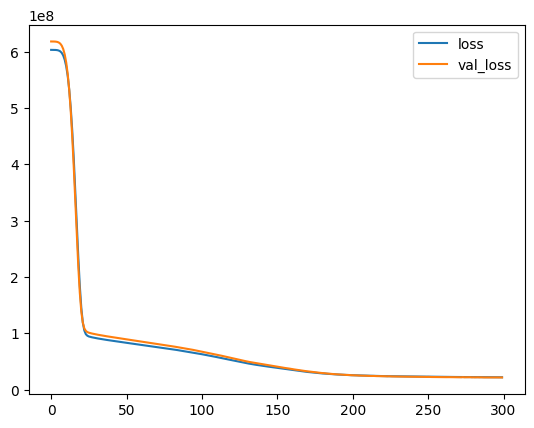

In [49]:
kayipVeriler.plot()

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
tahminDizisi=model.predict(X_test)

101/101 [==============================] - 0s 889us/step


In [52]:
tahminDizisi

array([[38463.605],
       [13089.569],
       [26109.062],
       ...,
       [22378.14 ],
       [ 8467.132],
       [15307.083]], dtype=float32)

In [60]:
mean_absolute_error(y_test,tahminDizisi) # tahmin ve gerçek veriler araında 3208 poundluk bir fark var

3208.430850270161

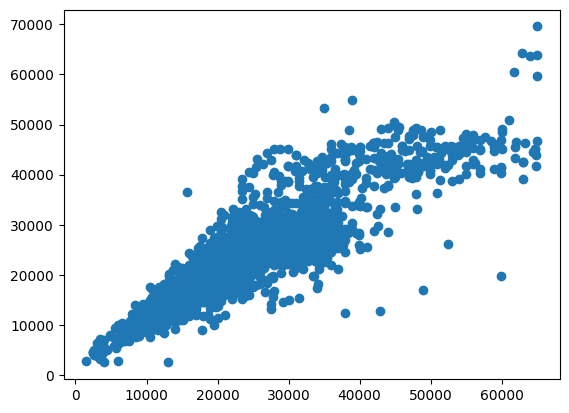

In [54]:
plt.scatter(y_test,tahminDizisi) #veride hafif sarkmalar var

In [59]:
yeniArabaSeries=df.drop("price",axis=1).iloc[2] # fiyatı 6500 olan bir arabayı denemek için çıkardık

In [56]:
yeniArabaSeries

year          2020.0
mileage       1435.0
tax            145.0
mpg             23.2
engineSize       4.4
Name: 6135, dtype: float64

In [57]:
yeniArabaSeries=scaler.transform(yeniArabaSeries.values.reshape(-1, 5))

In [58]:
model.predict(yeniArabaSeries)

1/1 [==============================] - 0s 21ms/step


array([[69576.31]], dtype=float32)

In [61]:
# Gerçek veri tahmini değer arasında yakın bir ilişki elde edildi tabi ki iyileştirmeler yaparak
# daha da iyi hale getirilebilir